In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # 引入seaborn库，用于绘制核密度估计图
from scipy.stats import boxcox

In [2]:
# 读取CSV文件
file_path = "GradeLevelData_V3.csv"  # 替换为你的GradeLevelData_V3.csv文件路径
df = pd.read_csv(file_path)

In [3]:
# 提取学生出勤率列
attendance_column_name = 'AttendancePercent'  # 替换为你的CSV文件中出勤率列的列名
attendance_data = df[attendance_column_name]

In [4]:
# 清理数据，去除非数字数据
attendance_data = pd.to_numeric(attendance_data, errors='coerce')
attendance_data = attendance_data.dropna()

#去除100
attendance_data = attendance_data[attendance_data != 100]

# #去除0
# attendance_data = attendance_data[attendance_data != 0]

In [5]:
# 对数据进行排序
sorted_attendance_data = attendance_data.sort_values()

In [6]:
# 使用 Box-Cox 变换
transformed_data, lambda_value = boxcox(sorted_attendance_data+1)  # 添加1以处理可能的零值

print(lambda_value)


# 创建一个 Series，将其与原始 DataFrame 合并
transformed_series = pd.Series(transformed_data, name='D_boxcox')

# 合并 DataFrame
df = pd.concat([df, transformed_series], axis=1)

# 创建新的 DataFrame 并保存为新的 CSV 文件
cleaned_file_path = 'sorted_cleaned_attendance_data_D_boxcox.csv'  # 替换为你想保存的新 CSV 文件路径
df.to_csv(cleaned_file_path, index=False)


6.518815561763866


In [7]:
# 创建新的DataFrame并保存为新CSV文件
cleaned_df = pd.DataFrame({attendance_column_name: sorted_attendance_data})
cleaned_file_path = 'cleaned_attendance_data.csv'  # 替换为你想保存的新CSV文件路径
cleaned_df.to_csv(cleaned_file_path, index=False)

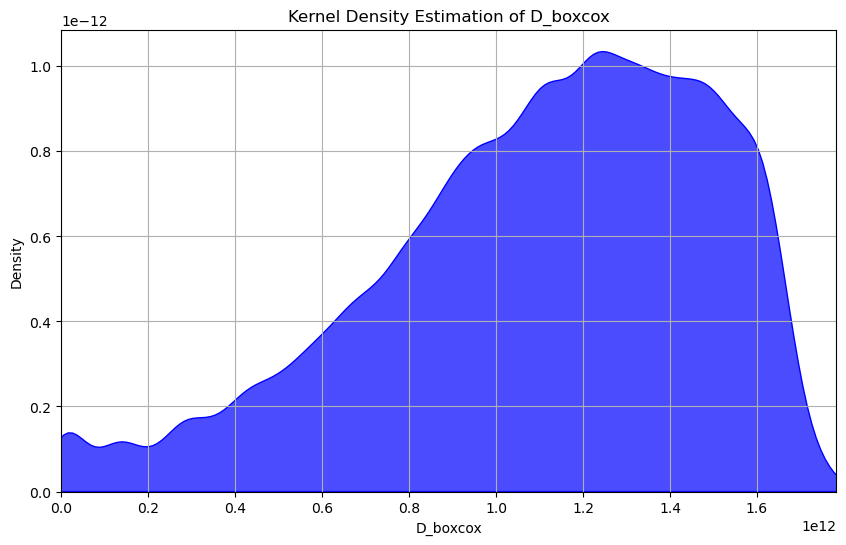

In [8]:
# 绘制核密度估计图并设置 x 轴范围
plt.figure(figsize=(10, 6))
sns.kdeplot(df['D_boxcox'], color='blue', fill=True, alpha=0.7)
plt.title('Kernel Density Estimation of D_boxcox')
plt.xlabel('D_boxcox')
plt.ylabel('Density')

# 设置 x 轴范围
plt.xlim(df['D_boxcox'].min(), df['D_boxcox'].max())  # 设置 x 轴范围为 D_boxcox 列的范围

plt.grid(True)
plt.show()